# Лабораторная работа №5. Деревья решений

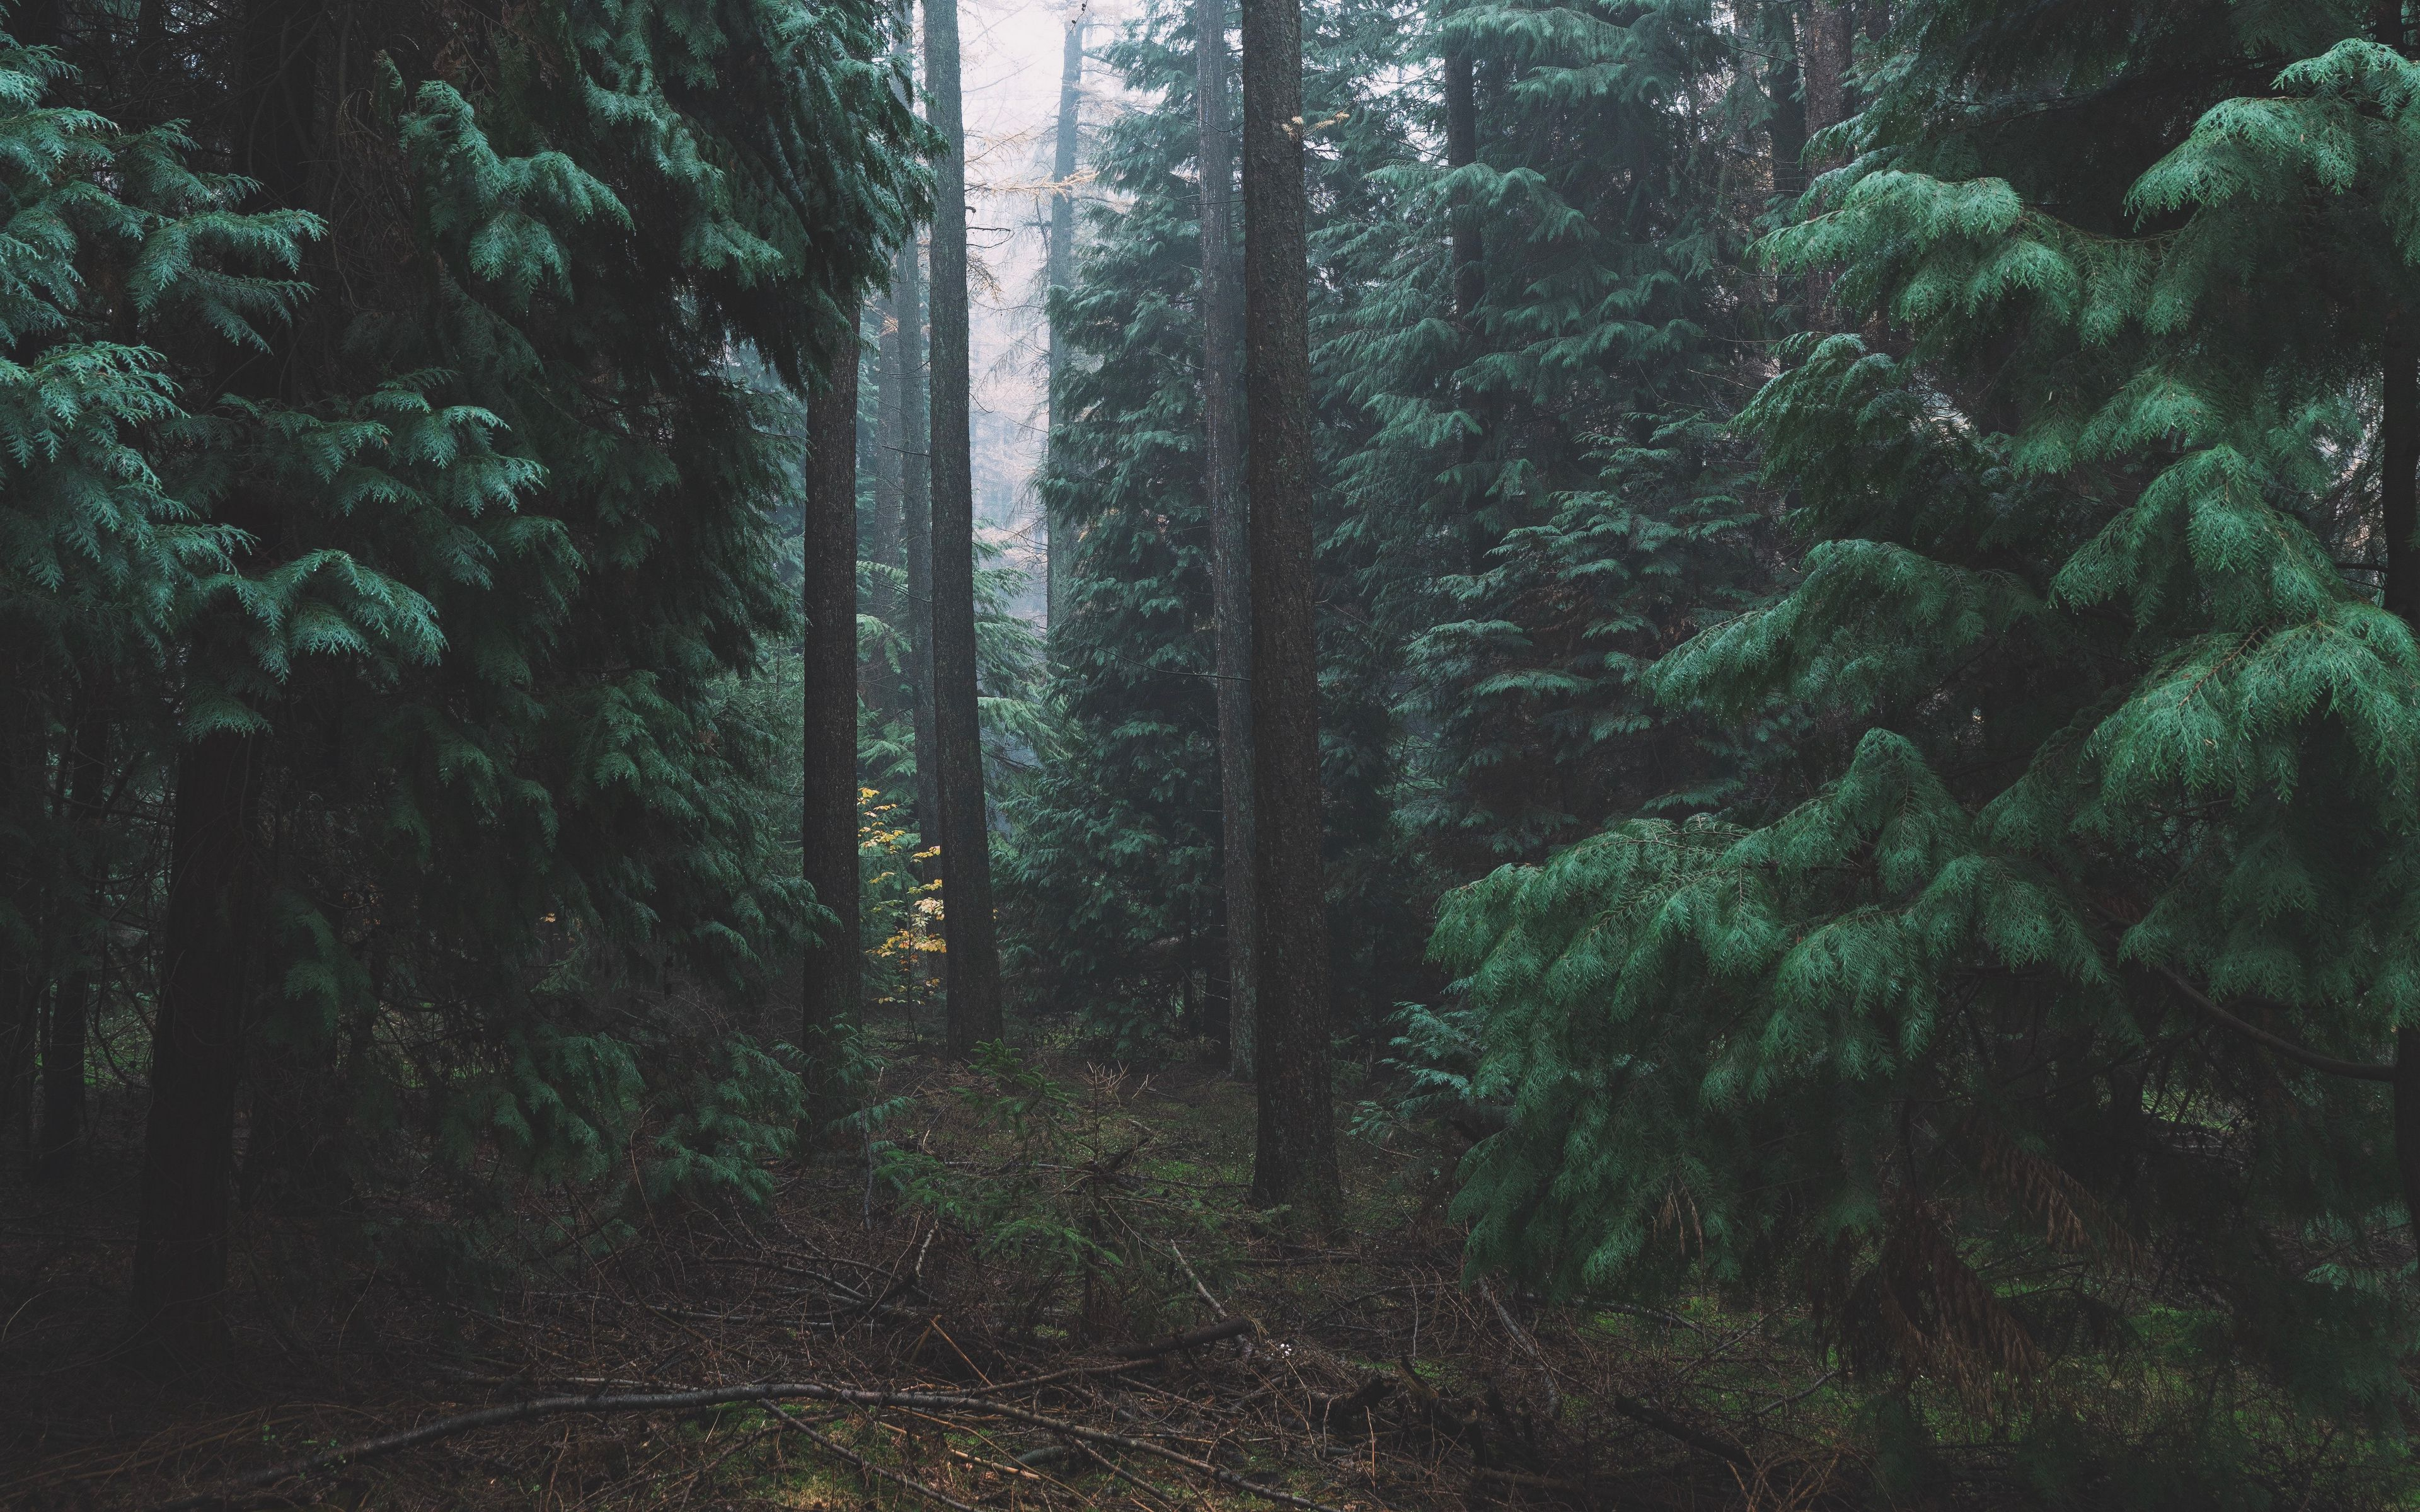

# Импорт всего

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import warnings
from random import randint

warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn import *
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

import category_encoders as ce
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error
from sklearn.metrics import r2_score

# Работа с регрессией

In [4]:
path_r = 'energy_task_preprocessed.csv'
data_r = pd.read_csv(path_r)

data_r.drop('date', axis= 1 , inplace= True )

In [5]:
data_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [6]:
data_r.head(5)

Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...         T9   RH_9  T_out  Press_mm_hg  RH_out  \
0  19.000000  45.566667  ...  17.033333  45.53   6.60        733.5    92.0   
1  19.000000  45.992500  ...  17.066667  45.56   6.48        733.6    92.0   
2  18.926667  45.890000  ...  17.000000  45.50   6.37        733.7    92.0   
3  18.890000  45.723333  ...  17.000000  45.40   6.25        733.8    92.0   
4  18.890000  45.530000  ...  17.000000  45.40   6.13        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  
0   7.000000   63.000000        5.3  13.275433  13.275433  
1   6.666667   59.166667        5.2  18.606195  18.606195  
2   6.333333   55.333333        5.1  28.642668  28.642668  
3   6.000000   51.500000        5.0  45.410390  45.410390  
4   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 28 columns]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaler = scaler.fit_transform(data_r)

In [8]:
y_r = data_r["Appliances"]
X_r = data_r.drop(["Appliances"], axis=1)

In [9]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2)

## Реализовать DecisionTreeRegressor из Sclearn для соответствующих наборов данных своего варианта. Осуществить настройку гиперпараметров.

Начнем с задачи регрессии:

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

param_dist = {
    "criterion": ["squared_error"],
    "max_depth": [1, 2, 3, 4],
    "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

reg_random_search = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
reg_random_search.fit(X_train_r, y_train_r)

best_regressor = reg_random_search.best_estimator_

print('Наилучшие гиперпараметры:', reg_random_search.best_params_)
print('Наилучшая оценка:', reg_random_search.best_score_)

Наилучшие гиперпараметры: {'min_samples_split': 10, 'min_samples_leaf': 7, 'max_depth': 4, 'criterion': 'squared_error'}
Наилучшая оценка: 0.11314122103874383


In [11]:
import pickle
with open('CART_model.pkl', 'wb') as file:
    pickle.dump(best_regressor, file)

### Обучаем модель на подобранных гиперпараметрах

In [13]:
Tree_regressor1 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=7, min_samples_split=10, criterion = 'squared_error')
Tree_regressor1.fit(X_train_r, y_train_r)

NameError: name 'X_train_r' is not defined

In [13]:
y_hat = Tree_regressor1.predict(X_train_r)
r2_score(y_train_r, y_hat)

0.14112141597615424

In [14]:
y_pred = Tree_regressor1.predict(X_test_r)
r2_score(y_test_r, y_pred)

0.11659017915313408

Реализация метрик и их результат:

In [15]:
def MSE(y_test_r, y_pred):
    diff = y_pred-y_test_r
    diff_squar=diff**2
    mean_diff=diff_squar.mean()
    return mean_diff
    
def MAE(y_test_r, y_pred):
    diff = y_pred-y_test_r
    abs_diff = np.absolute(diff)
    mean_diff = abs_diff.mean()
    return mean_diff

def MAPE(y_test_r, y_pred):
    mean_diff = np.mean(np.abs((y_test_r-y_pred)/y_test_r))*100
    return mean_diff



print(f'MSE: {MSE(y_test_r, y_pred)}')
print(f'MAE: {MAE(y_test_r, y_pred)}')
print(f'RMSE: {np.sqrt(MSE(y_test_r, y_pred))}')
print(f'MAPE: {np.sqrt(MAPE(y_test_r, y_pred))}')
print(f'R^2: {Tree_regressor.score(X_test_r, y_test_r)}')

MSE: 8959.75639519455
MAE: 54.48162420571498
RMSE: 94.6559897481113
MAPE: 7.97577772267952


NameError: name 'Tree_regressor' is not defined

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_train_r, y=y_hat, alpha=0.6)
sns.lineplot(x=y_train_r, y=y_train_r, color='red', linewidth=2)
plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_train_r['Visibility'],y_train_r, color = "red")

ax.scatter(X_train_r['Visibility'],y_hat, color = "blue")

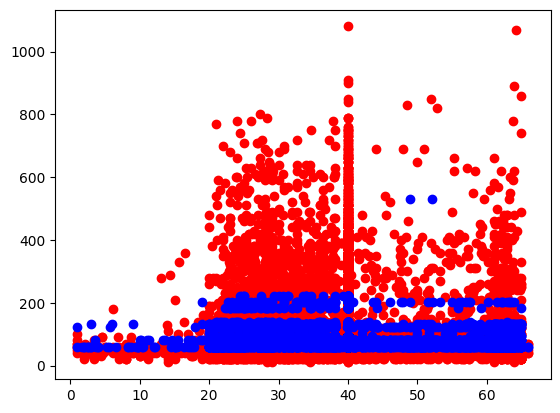

In [16]:
fig, ax = plt.subplots()
ax.scatter(X_train_r['Visibility'],y_train_r, color = "red")

ax.scatter(X_test_r['Visibility'],y_pred, color = "blue")

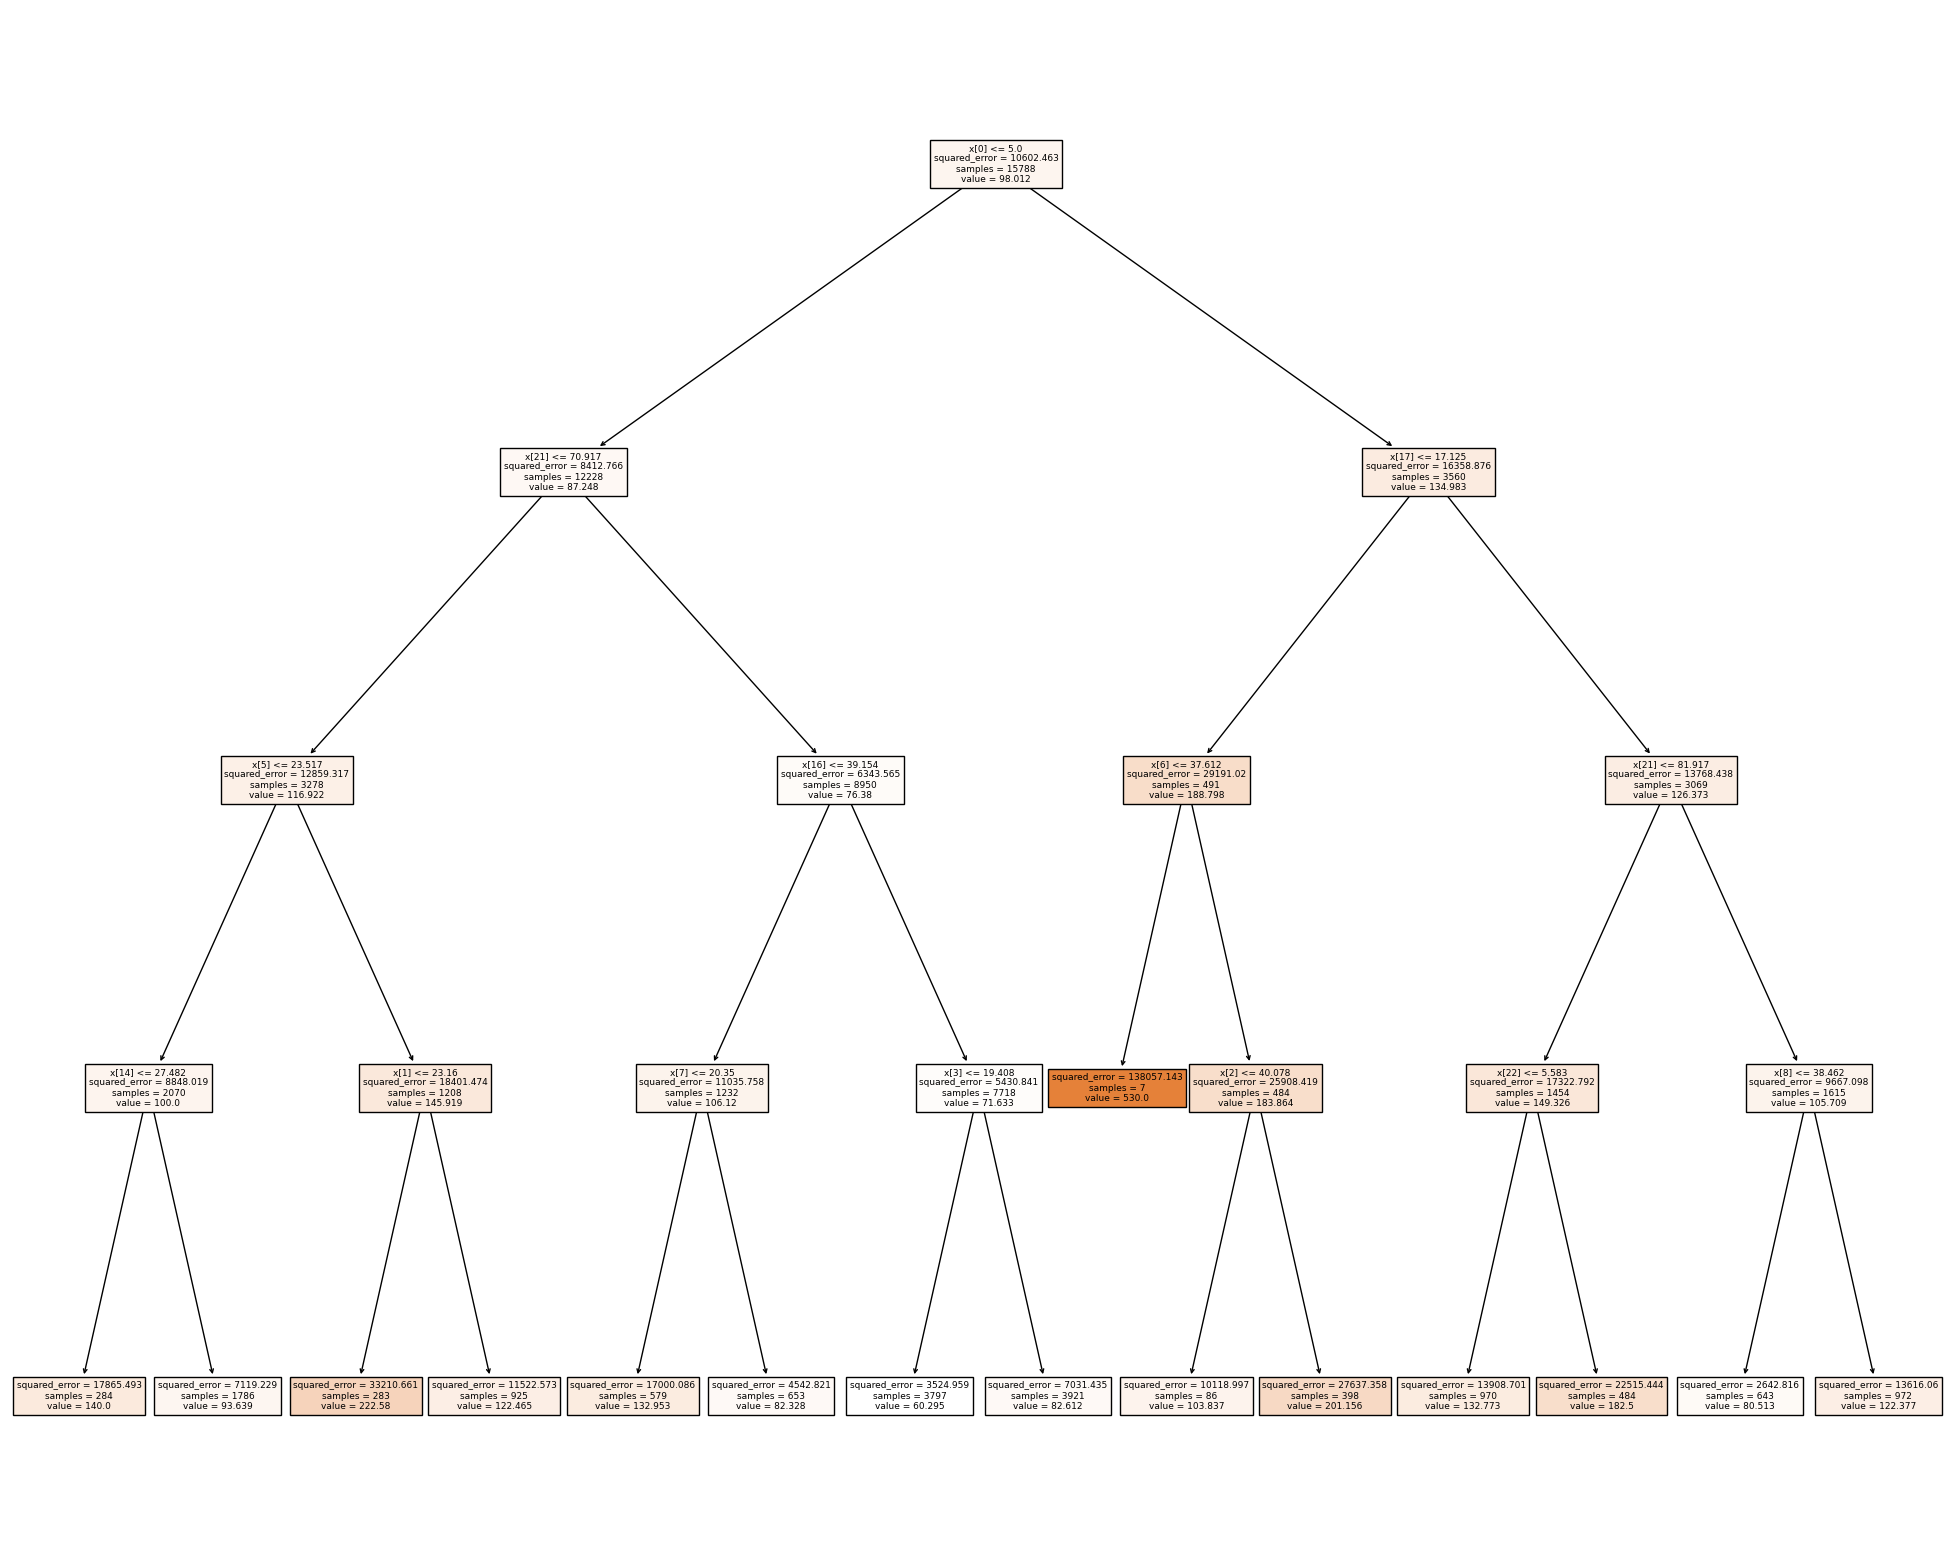

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Tree_regressor1, filled=True)

In [18]:
print(tree.export_text(Tree_regressor1))

|--- feature_0 <= 5.00
|   |--- feature_21 <= 70.92
|   |   |--- feature_5 <= 23.52
|   |   |   |--- feature_14 <= 27.48
|   |   |   |   |--- value: [140.00]
|   |   |   |--- feature_14 >  27.48
|   |   |   |   |--- value: [93.64]
|   |   |--- feature_5 >  23.52
|   |   |   |--- feature_1 <= 23.16
|   |   |   |   |--- value: [222.58]
|   |   |   |--- feature_1 >  23.16
|   |   |   |   |--- value: [122.46]
|   |--- feature_21 >  70.92
|   |   |--- feature_16 <= 39.15
|   |   |   |--- feature_7 <= 20.35
|   |   |   |   |--- value: [132.95]
|   |   |   |--- feature_7 >  20.35
|   |   |   |   |--- value: [82.33]
|   |   |--- feature_16 >  39.15
|   |   |   |--- feature_3 <= 19.41
|   |   |   |   |--- value: [60.29]
|   |   |   |--- feature_3 >  19.41
|   |   |   |   |--- value: [82.61]
|--- feature_0 >  5.00
|   |--- feature_17 <= 17.12
|   |   |--- feature_6 <= 37.61
|   |   |   |--- value: [530.00]
|   |   |--- feature_6 >  37.61
|   |   |   |--- feature_2 <= 40.08
|   |   |   |   |--- v

### Обучение без гиперпараметров:

In [19]:
Tree_regressor2 = DecisionTreeRegressor()
Tree_regressor2.fit(X_train_r, y_train_r)

DecisionTreeRegressor()

In [20]:
y_hat = Tree_regressor2.predict(X_train_r)
r2_score(y_train_r, y_hat)

1.0

In [21]:
y_pred = Tree_regressor2.predict(X_test_r)
r2_score(y_test_r, y_pred)

0.057596088286934966

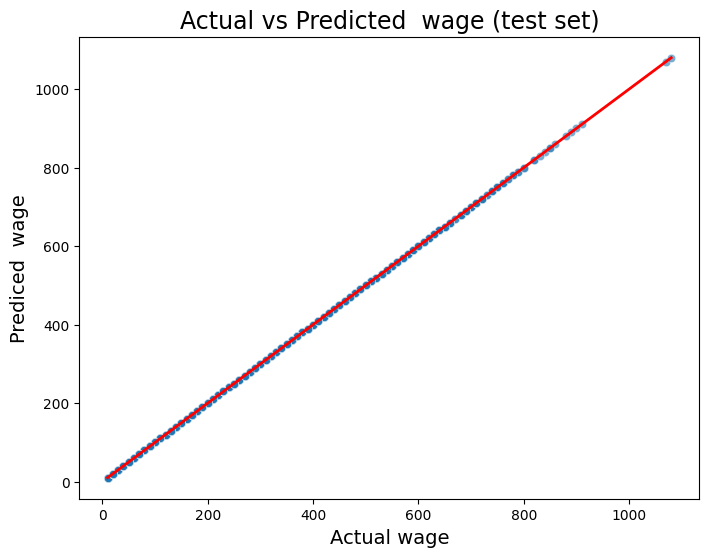

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_train_r, y=y_hat, alpha=0.6)
sns.lineplot(x=y_train_r, y=y_train_r, color='red', linewidth=2)
plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

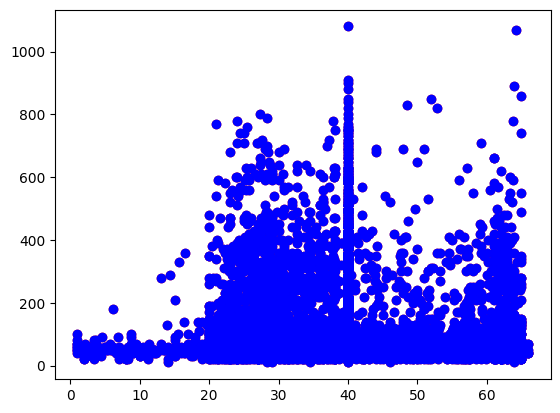

In [26]:
fig, ax = plt.subplots()
ax.scatter(X_train_r['Visibility'],y_train_r, color = "red")

ax.scatter(X_train_r['Visibility'],y_hat, color = "blue")

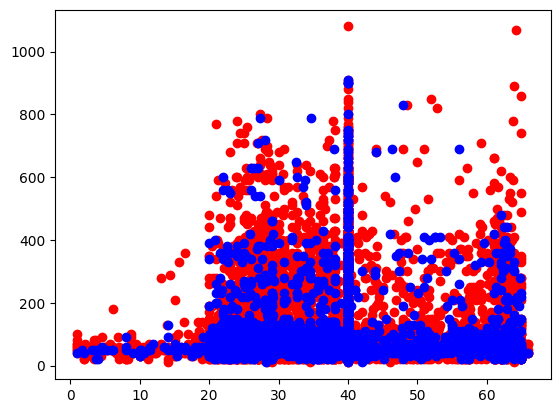

In [27]:
fig, ax = plt.subplots()
ax.scatter(X_train_r['Visibility'],y_train_r, color = "red")

ax.scatter(X_test_r['Visibility'],y_pred, color = "blue")

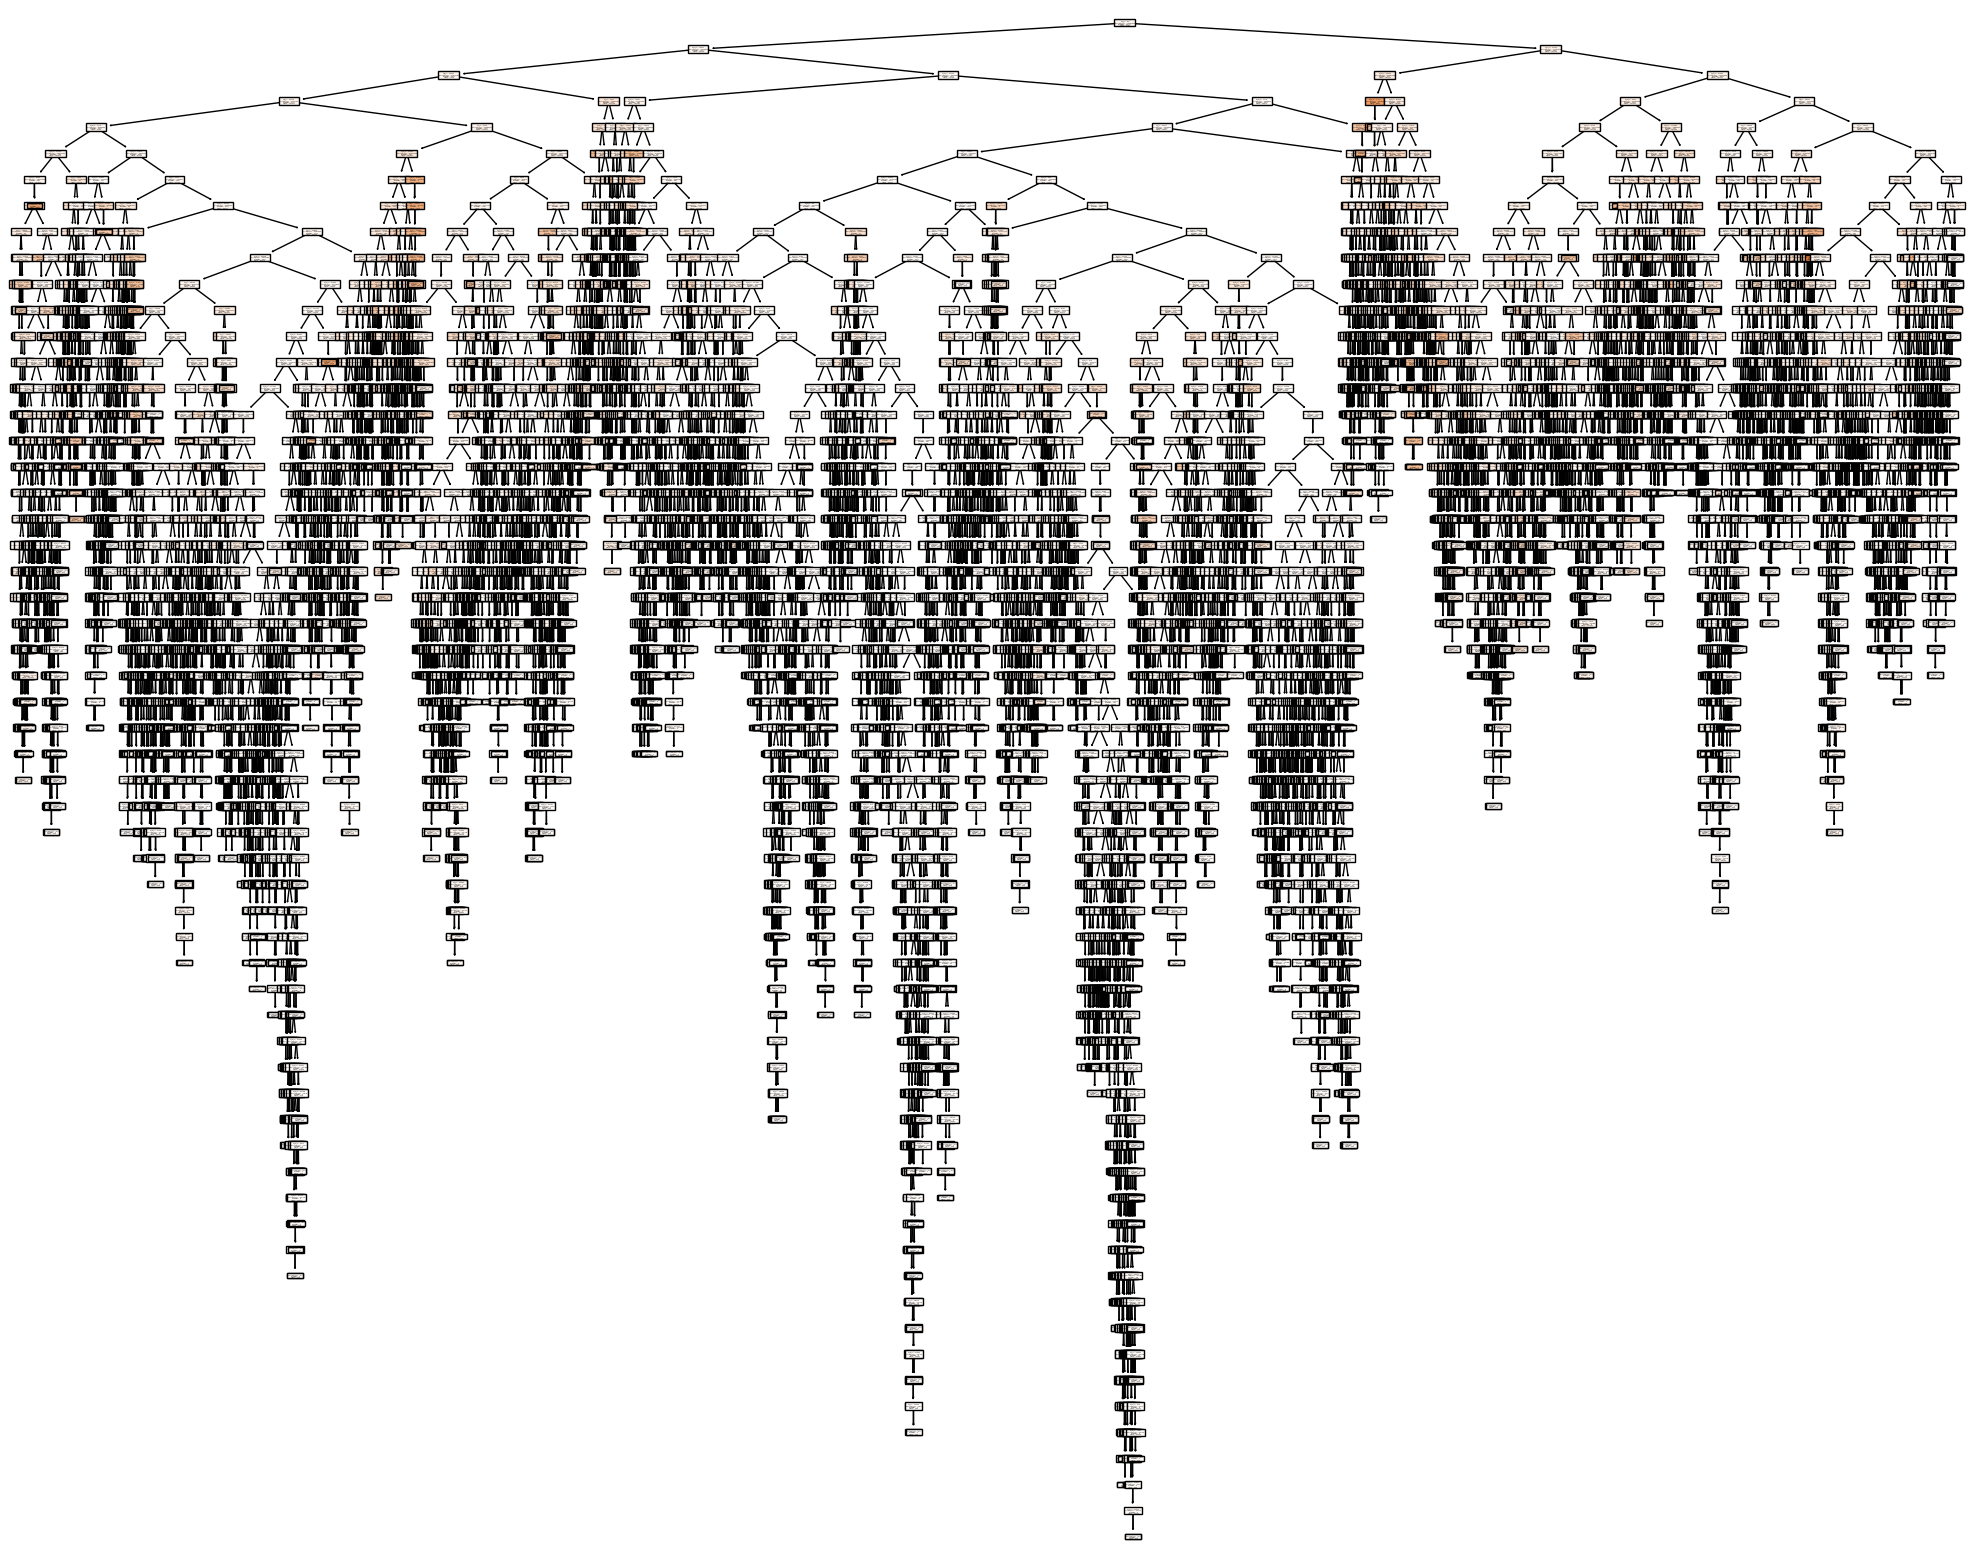

In [162]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Tree_regressor2, filled=True)

In [28]:
print(f'predict train: {r2_score(y_test_r, y_pred)}')
print(f'predict test: {r2_score(y_train_r, y_hat)}')

predict train: 0.18139402655198356
predict test: 1.0


In [29]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=0)
cv_results = cross_validate(
    Tree_regressor2, X_r, y_r, cv=cv, scoring="r2"
)

In [30]:
cv_results = pd.DataFrame(cv_results)
cv_results['test_score'].mean()

0.08551543585748228

In [167]:
print(tree.export_text(Tree_regressor2))

|--- feature_0 <= 5.00
|   |--- feature_21 <= 78.92
|   |   |--- feature_5 <= 26.95
|   |   |   |--- feature_5 <= 23.23
|   |   |   |   |--- feature_20 <= 749.60
|   |   |   |   |   |--- feature_12 <= 73.74
|   |   |   |   |   |   |--- feature_17 <= 20.85
|   |   |   |   |   |   |   |--- feature_21 <= 57.83
|   |   |   |   |   |   |   |   |--- feature_3 <= 18.83
|   |   |   |   |   |   |   |   |   |--- feature_24 <= -1.27
|   |   |   |   |   |   |   |   |   |   |--- feature_13 <= 19.08
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_13 >  19.08
|   |   |   |   |   |   |   |   |   |   |   |--- value: [590.00]
|   |   |   |   |   |   |   |   |   |--- feature_24 >  -1.27
|   |   |   |   |   |   |   |   |   |   |--- feature_23 <= 33.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [340.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_23 >  33.00
|   |   |   |   |   |   |   |   |   |   |   |-

# Задача классификации

In [18]:
path_c= 'Data4_preprocessed3.csv'
data_c = pd.read_csv(path_c)
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80871 entries, 0 to 80870
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    80871 non-null  float64
 1   est_diameter_max    80871 non-null  float64
 2   relative_velocity   80871 non-null  float64
 3   miss_distance       80871 non-null  float64
 4   absolute_magnitude  80871 non-null  float64
 5   hazardous           80871 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 3.7 MB


In [19]:
data_c.head()

est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0          0.016016          0.035813       56014.078517   1.024333e+06   
1          0.030518          0.068240        7864.348060   3.268186e+07   
2          0.055533          0.124177       55257.544508   6.538636e+07   
3          0.019256          0.043057       41531.404722   1.260796e+07   
4          0.139494          0.311918       67639.394481   7.130590e+07   

   absolute_magnitude  hazardous  
0                26.1          0  
1                24.7          0  
2                23.4          0  
3                25.7          0  
4                21.4          0

In [22]:
data_c.head()

est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0          0.016016          0.035813       56014.078517   1.024333e+06   
1          0.030518          0.068240        7864.348060   3.268186e+07   
2          0.055533          0.124177       55257.544508   6.538636e+07   
3          0.019256          0.043057       41531.404722   1.260796e+07   
4          0.139494          0.311918       67639.394481   7.130590e+07   

   absolute_magnitude  hazardous  
0                26.1          0  
1                24.7          0  
2                23.4          0  
3                25.7          0  
4                21.4          0

In [20]:
y_c = data_c["hazardous"]
X_c = data_c.drop(["hazardous"], axis=1)

In [21]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2)

In [25]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

classifier1 = DecisionTreeClassifier()

param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": randint(1, 4),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10)
}

clf_random_search = RandomizedSearchCV(classifier1, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
clf_random_search.fit(X_train_c, y_train_c)

best_classifier = clf_random_search.best_estimator_

print('Наилучшие гиперпараметры:', clf_random_search.best_params_)
print('Наилучшая оценка:', clf_random_search.best_score_)

Наилучшие гиперпараметры: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 13}
Наилучшая оценка: 0.9289898755699824


## Обучение модели с подбором гиперпараметров

In [22]:
Tree_classifier1 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10, criterion = 'gini')
Tree_classifier1.fit(X_train_c, y_train_c)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10)

In [23]:
y_hat_c = Tree_classifier1.predict(X_train_c)
r2_score(y_train_c, y_hat_c)

0.038662169586621054

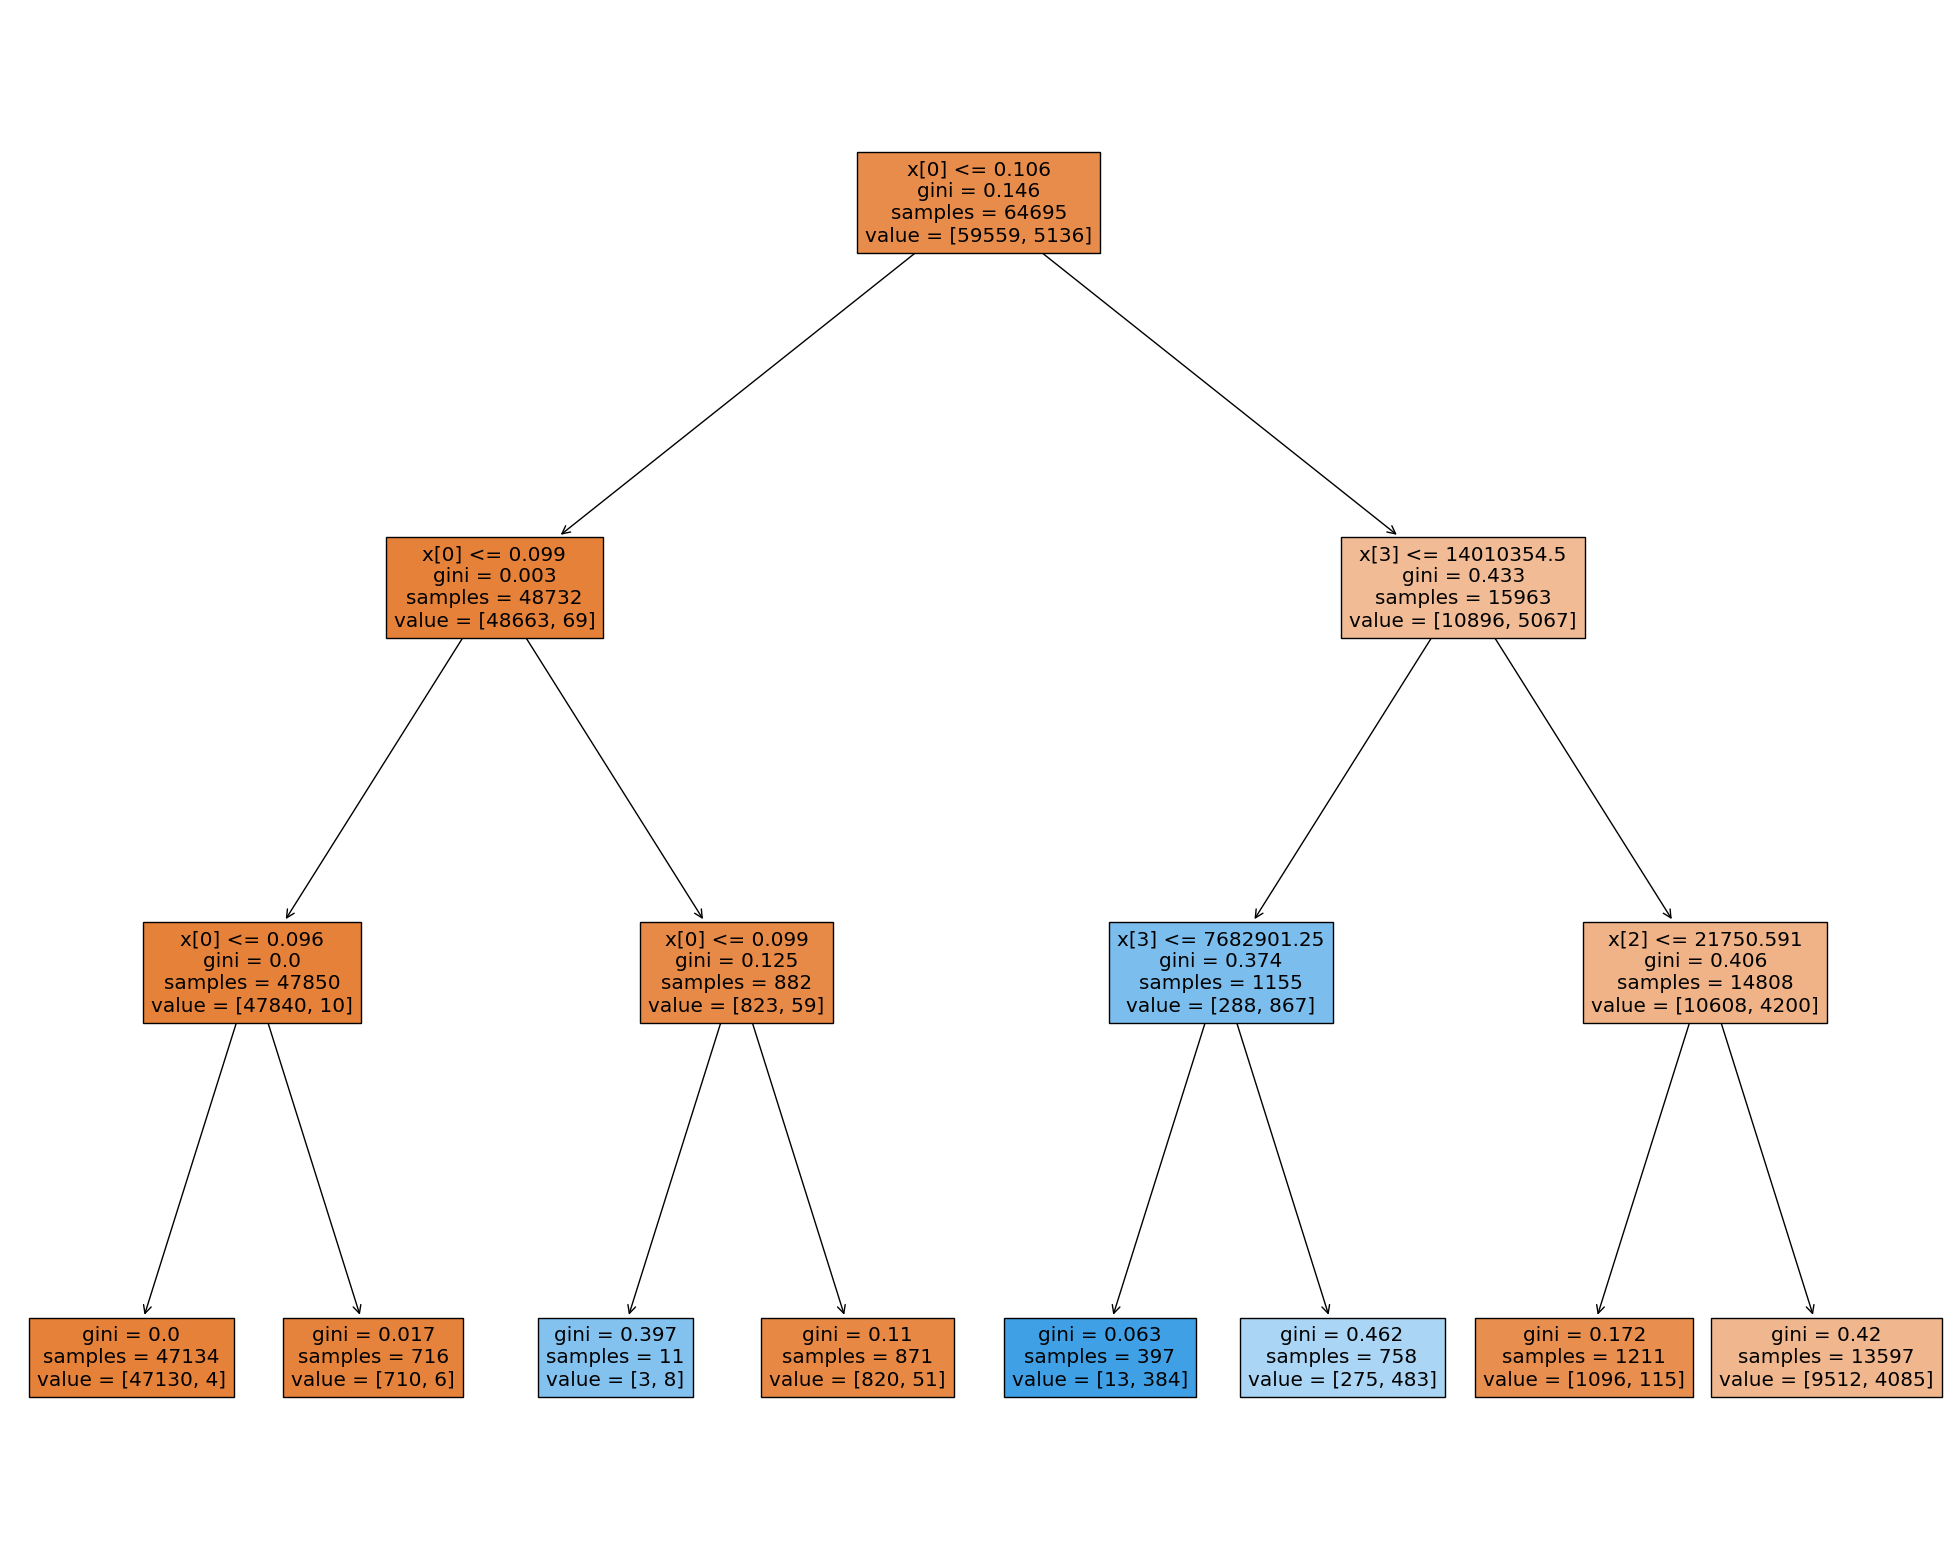

In [28]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Tree_classifier1, filled=True)

In [29]:
print(tree.export_text(Tree_classifier1))

|--- feature_0 <= 0.11
|   |--- feature_0 <= 0.10
|   |   |--- feature_0 <= 0.10
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.10
|   |   |   |--- class: 0
|   |--- feature_0 >  0.10
|   |   |--- feature_0 <= 0.10
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.10
|   |   |   |--- class: 0
|--- feature_0 >  0.11
|   |--- feature_3 <= 14010354.50
|   |   |--- feature_3 <= 7682901.25
|   |   |   |--- class: 1
|   |   |--- feature_3 >  7682901.25
|   |   |   |--- class: 1
|   |--- feature_3 >  14010354.50
|   |   |--- feature_2 <= 21750.59
|   |   |   |--- class: 0
|   |   |--- feature_2 >  21750.59
|   |   |   |--- class: 0



## Обучение без гиперпараметров

In [57]:
Tree_classifier2 = DecisionTreeClassifier()
Tree_classifier2.fit(X_train_c, y_train_c)

DecisionTreeClassifier()

In [58]:
y_hat_c = Tree_classifier2.predict(X_train_c)
r2_score(y_train_c, y_hat_c)

1.0

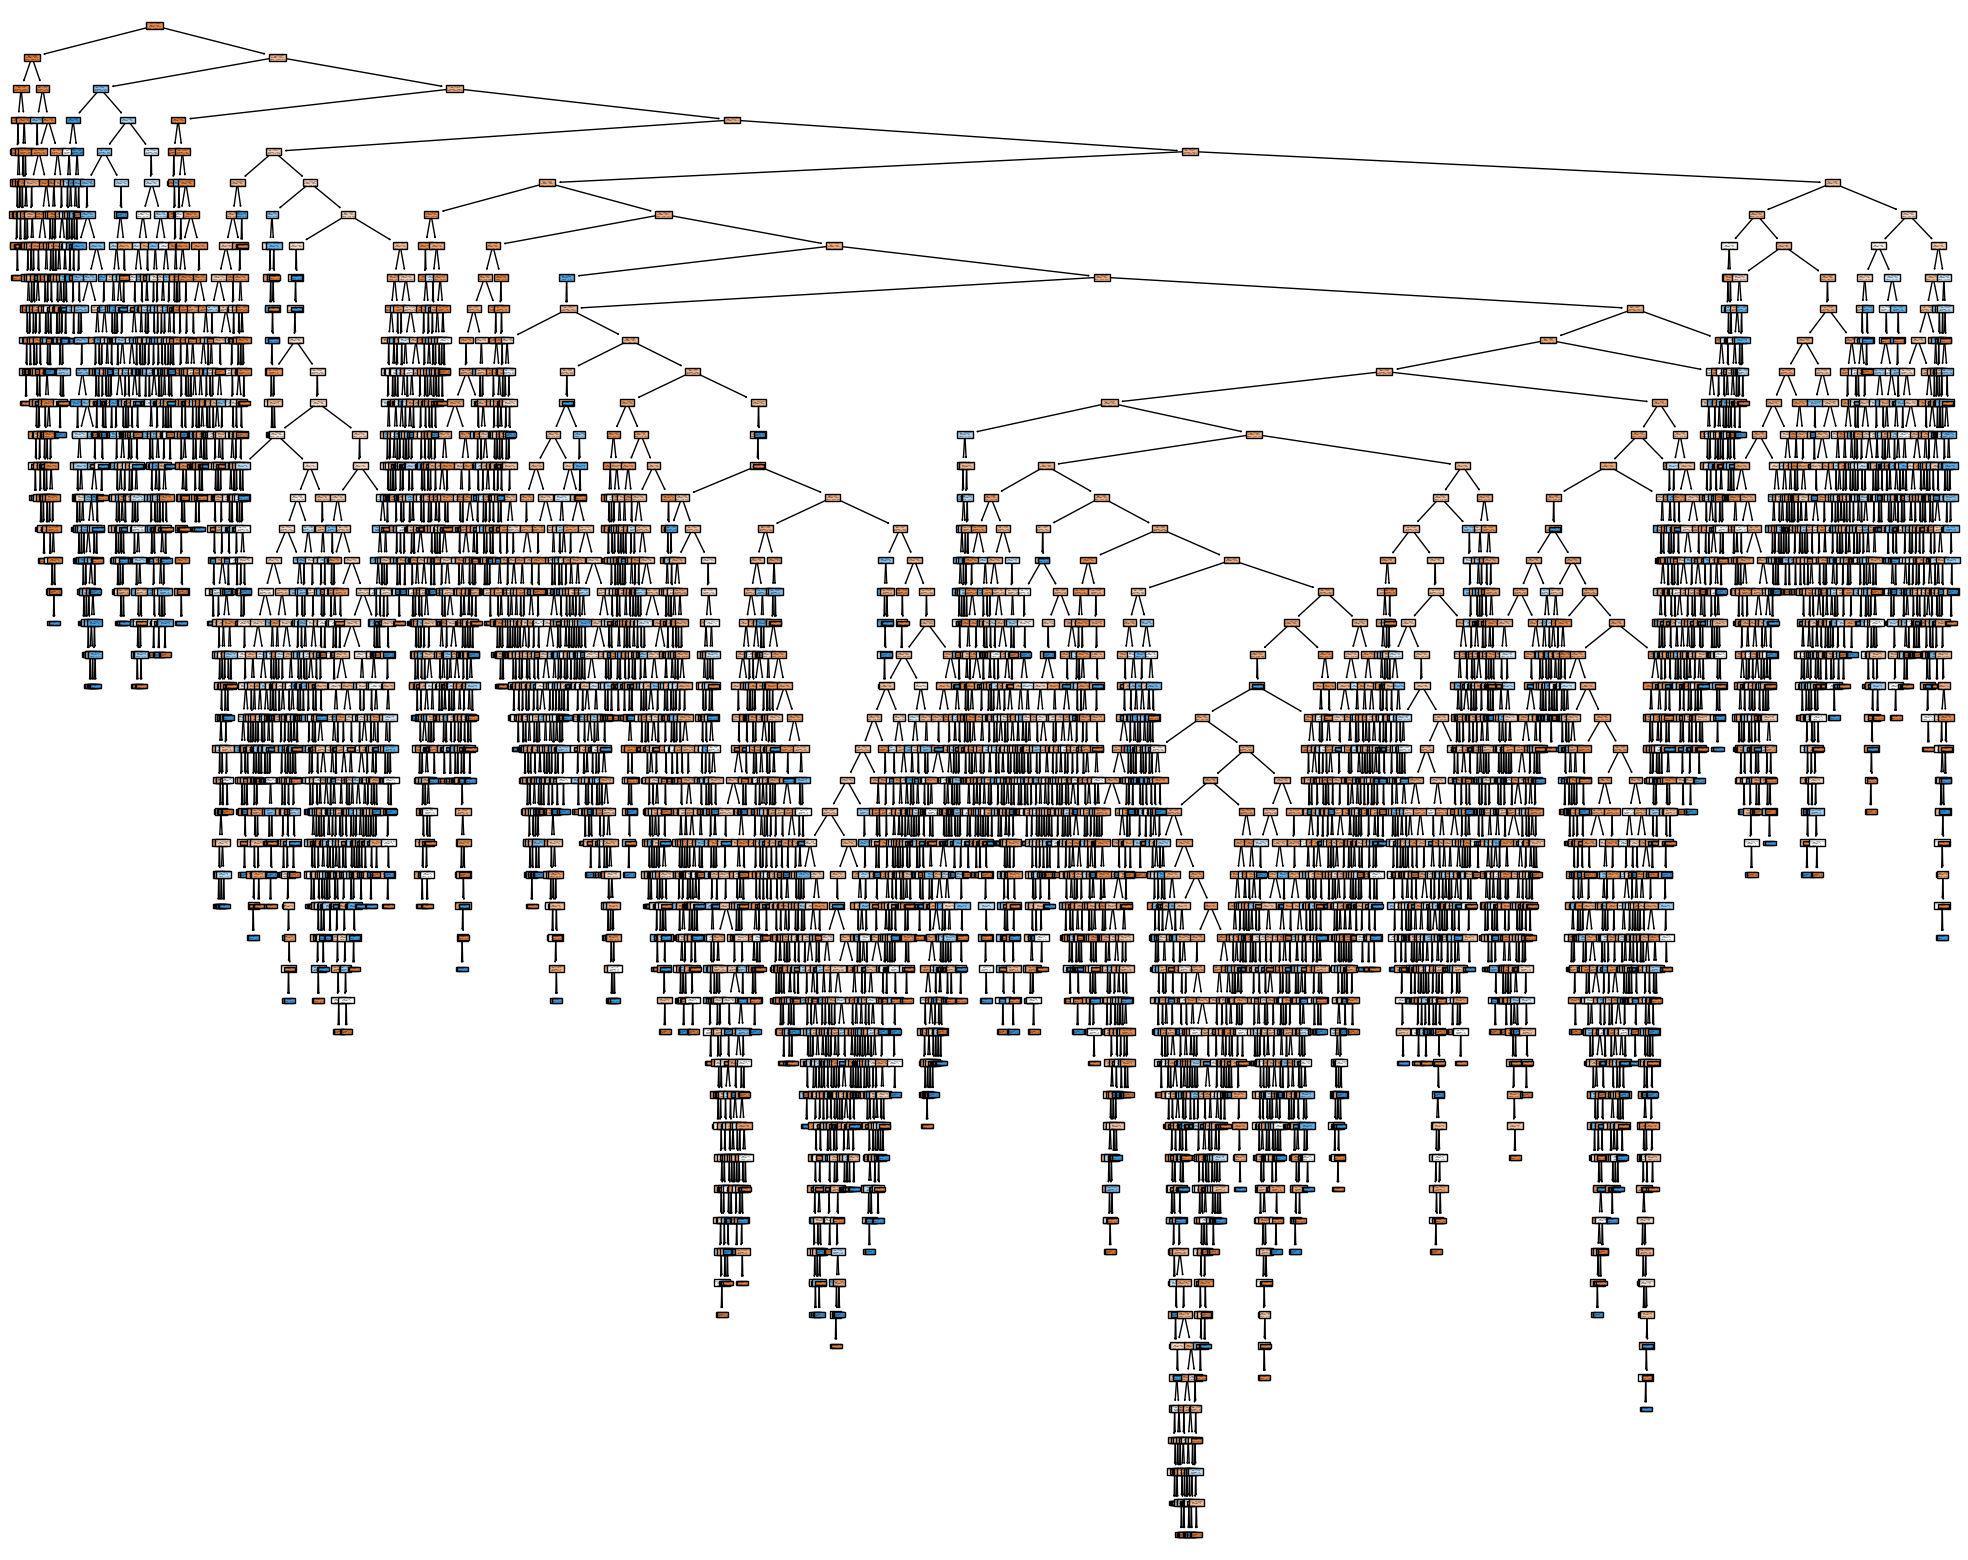

In [59]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Tree_classifier2, filled=True)

In [60]:
print(tree.export_text(Tree_classifier2))

|--- feature_0 <= 0.11
|   |--- feature_0 <= 0.10
|   |   |--- feature_0 <= 0.10
|   |   |   |--- feature_0 <= 0.09
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.09
|   |   |   |   |--- feature_3 <= 11754659.50
|   |   |   |   |   |--- feature_3 <= 11729150.50
|   |   |   |   |   |   |--- feature_2 <= 52047.49
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  52047.49
|   |   |   |   |   |   |   |--- feature_2 <= 52196.34
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  52196.34
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  11729150.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  11754659.50
|   |   |   |   |   |--- feature_3 <= 68280744.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  68280744.00
|   |   |   |   |   |   |--- feature_3 <= 68311940.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |

## CART for regression

In [37]:
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train_r, y_train_r)

DecisionTreeRegressor(random_state=42)

MSE: 9872.18140359767
R^2: 0.06466531783353446


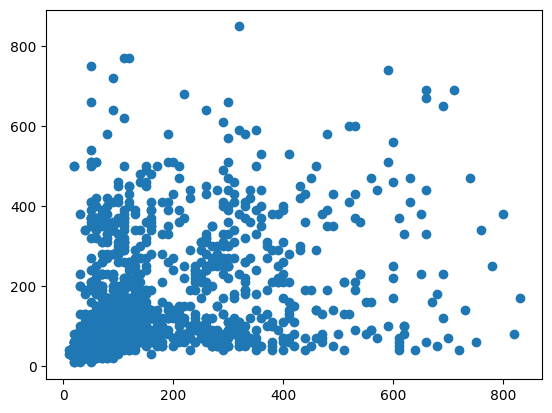

In [39]:
y_pred = tree_regressor.predict(X_test_r)

mse = mean_squared_error(y_test_r, y_pred)
print("MSE:", mse)

r2 = r2_score(y_test_r, y_pred)
print("R^2:", r2)
plt.scatter(y_test_r, y_pred)
plt.show()

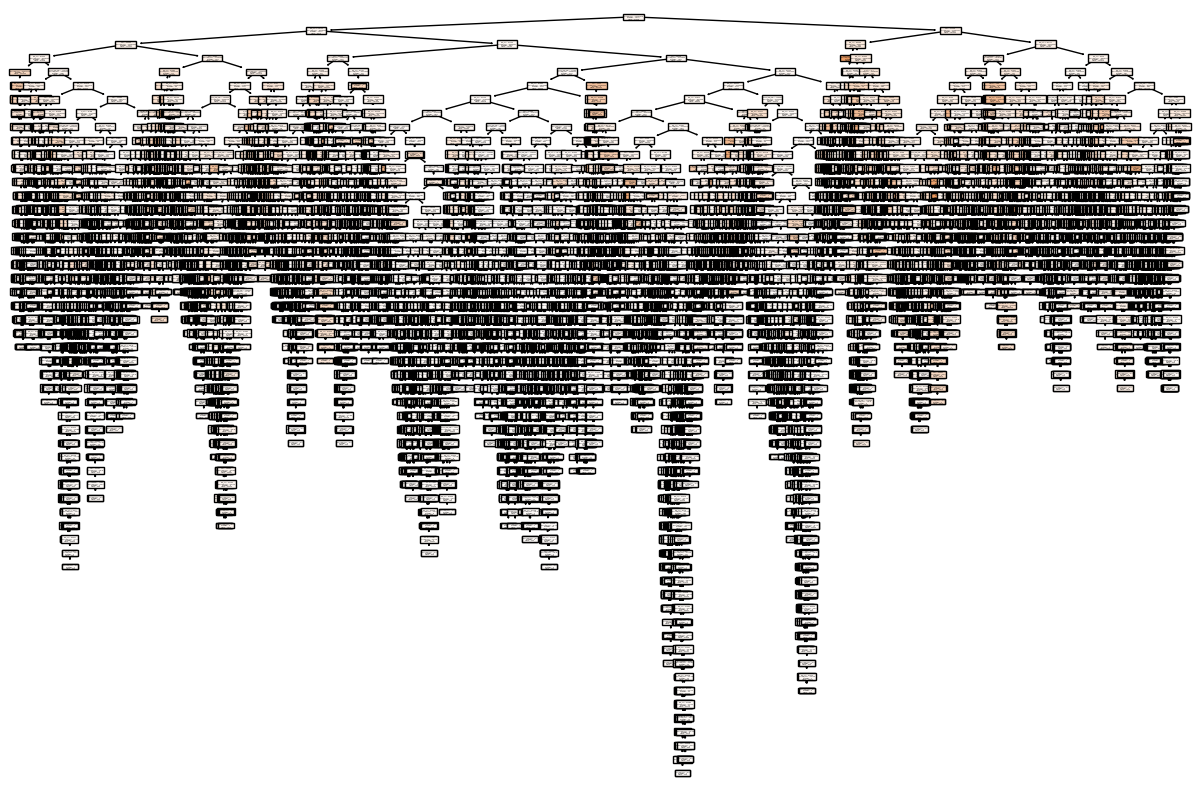

In [40]:
fig = plt.figure(figsize=(15,10))
plot = tree.plot_tree(tree_regressor, feature_names=X_train_r.columns.tolist(), filled=True)

In [41]:
print(tree.export_text(tree_regressor))

|--- feature_0 <= 5.00
|   |--- feature_21 <= 70.92
|   |   |--- feature_5 <= 23.25
|   |   |   |--- feature_18 <= 30.03
|   |   |   |   |--- feature_13 <= 19.82
|   |   |   |   |   |--- feature_7 <= 20.43
|   |   |   |   |   |   |--- feature_26 <= 37.88
|   |   |   |   |   |   |   |--- feature_10 <= 38.55
|   |   |   |   |   |   |   |   |--- value: [100.00]
|   |   |   |   |   |   |   |--- feature_10 >  38.55
|   |   |   |   |   |   |   |   |--- value: [110.00]
|   |   |   |   |   |   |--- feature_26 >  37.88
|   |   |   |   |   |   |   |--- value: [130.00]
|   |   |   |   |   |--- feature_7 >  20.43
|   |   |   |   |   |   |--- value: [300.00]
|   |   |   |   |--- feature_13 >  19.82
|   |   |   |   |   |--- feature_8 <= 32.15
|   |   |   |   |   |   |--- feature_16 <= 34.55
|   |   |   |   |   |   |   |--- feature_11 <= 10.93
|   |   |   |   |   |   |   |   |--- value: [550.00]
|   |   |   |   |   |   |   |--- feature_11 >  10.93
|   |   |   |   |   |   |   |   |--- value: [560.00]


## CART for classifier

In [43]:
tree_classifier = DecisionTreeRegressor(random_state=42)
tree_classifier.fit(X_train_c, y_train_c)

DecisionTreeRegressor(random_state=42)

MSE: 0.08612588104365031
R^2: -0.1989577280109669


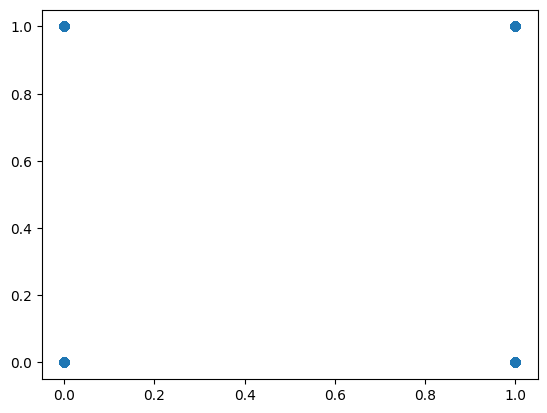

In [44]:
y_pred = tree_classifier.predict(X_test_c)

mse = mean_squared_error(y_test_c, y_pred)
print("MSE:", mse)

r2 = r2_score(y_test_c, y_pred)
print("R^2:", r2)
plt.scatter(y_test_c, y_pred)
plt.show()

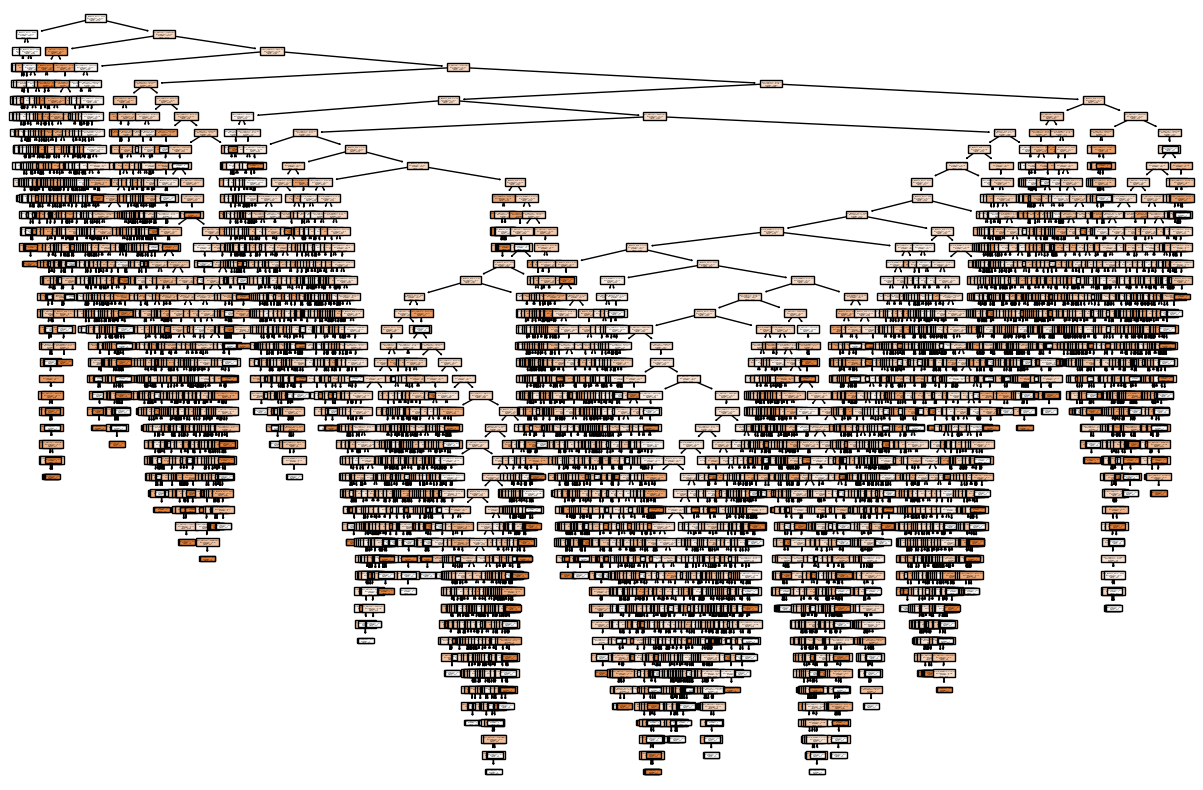

In [45]:
fig = plt.figure(figsize=(15,10))
plot = tree.plot_tree(tree_classifier, feature_names=X_train_c.columns.tolist(), filled=True)

In [46]:
print(tree.export_text(tree_classifier))

|--- feature_0 <= 0.10
|   |--- feature_0 <= 0.10
|   |   |--- feature_0 <= 0.10
|   |   |   |--- feature_0 <= 0.09
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_0 >  0.09
|   |   |   |   |--- feature_3 <= 11754659.50
|   |   |   |   |   |--- feature_3 <= 11729150.50
|   |   |   |   |   |   |--- feature_2 <= 52047.49
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- feature_2 >  52047.49
|   |   |   |   |   |   |   |--- feature_2 <= 52882.46
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |--- feature_2 >  52882.46
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_3 >  11729150.50
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_3 >  11754659.50
|   |   |   |   |   |--- feature_3 <= 68280744.00
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_3 >  68280744.00
|   |   |   |   |   |   |--- feature_3 <= 68311940.00
|   |   |   |   |   |

### BaggingRegressor

In [53]:
from sklearn.ensemble import BaggingRegressor
clf = BaggingRegressor().fit(X_train_r, y_train_r)
y_bc_pred = clf.predict(X_test_r)

accuracy = cross_val_score(estimator = clf, X = X_train_r, y = y_train_r, cv = 5 , scoring="accuracy" )
print("Accuracy:", round(accuracy.mean(),3))

Accuracy: 0.027


### BaggingClassifier

In [24]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=10).fit(X_train_c, y_train_c)
y_bc_pred = clf.predict(X_test_c)

accuracy = cross_val_score(estimator = clf, X = X_train_c, y = y_train_c, cv = 5 , scoring="accuracy" )
print("Accuracy:", round(accuracy.mean(),3))

Accuracy: 0.93


In [25]:
import pickle
with open('bagging.pkl', 'wb') as file:
    pickle.dump(clf, file)

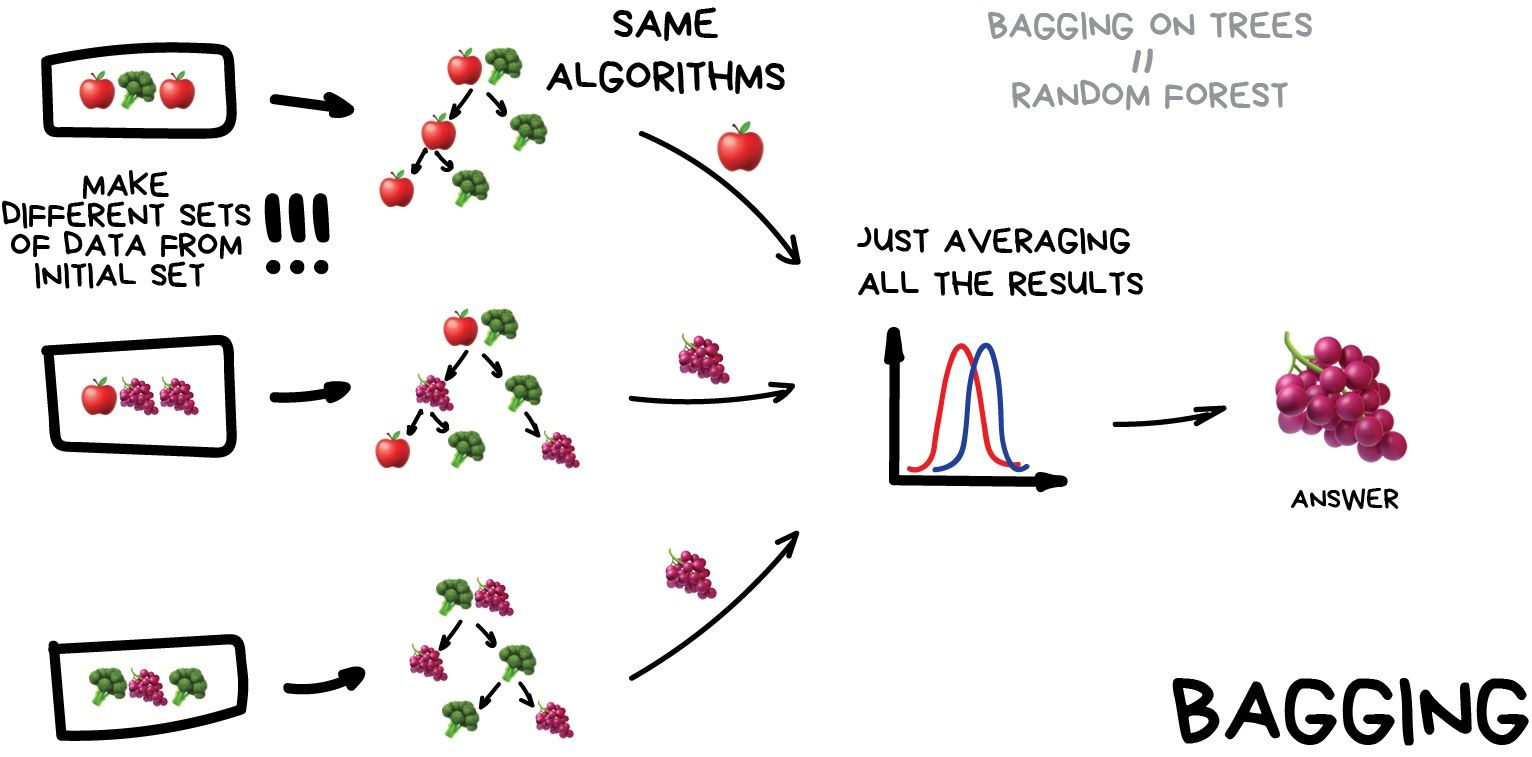

## GradientBoostingClassifier

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
clf.fit(X_train_c, y_train_c)
predict = clf.predict(X_test_c)

In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test_c, predict))

print("Classification Report")
print(classification_report(y_test_c, predict))
accuracy = cross_val_score(estimator = clf, X = X_train_c, y = y_train_c, cv = 5 , scoring="accuracy" )
print("Accuracy:", round(accuracy.mean(),3))

Confusion Matrix:
[[14776    98]
 [ 1087   214]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     14874
           1       0.69      0.16      0.27      1301

    accuracy                           0.93     16175
   macro avg       0.81      0.58      0.61     16175
weighted avg       0.91      0.93      0.91     16175

Accuracy: 0.93


In [28]:
import pickle
with open('boosting.pkl', 'wb') as file:
    pickle.dump(clf, file)

## GradientBoostingRegressor

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
clf.fit(X_train_r, y_train_r)
predict = clf.predict(X_test_r)

In [84]:
MSE_test = round(np.mean(np.square(y_test_r - predict)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

(9226.72, 96.06)

## StackingClassifier

In [29]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators = [("dtr", Tree_classifier1)], final_estimator=Tree_classifier1).fit(X_train_c, y_train_c)
y_sc_pred = clf.predict(X_test_c)

accuracy = cross_val_score(estimator = clf, X = X_train_c, y = y_train_c, cv = 5 , scoring="accuracy" )
print("Accuracy:", round(accuracy.mean(),3))

Accuracy: 0.93


In [30]:
import pickle
with open('stacking.pkl', 'wb') as file:
    pickle.dump(clf, file)

## StackingRegressor

In [86]:
from sklearn.ensemble import StackingRegressor
clf = StackingRegressor(estimators = [("dtr", Tree_regressor1)], final_estimator=Tree_regressor1).fit(X_train_r, y_train_r)
y_sc_pred = clf.predict(X_test_r)

MSE_test = round(np.mean(np.square(y_test_r - y_sc_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

(9452.97, 97.23)

## CatBoost, XGBoost, LightGBM

In [33]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(iterations=2,
                          learning_rate=0.5,
                          depth=10)

cat.fit(X_train_r, y_train_r)

y_pred_catC = cat.predict(X_train_r)

print(cat.score(X_train_r, y_train_r))

0:	learn: 96.6086866	total: 41.4ms	remaining: 41.4ms
1:	learn: 91.5704738	total: 75ms	remaining: 0us
0.2091317395174508


In [34]:
from xgboost import XGBRegressor

XGB_regressor = XGBRegressor(eta=0.1, max_depth=6)
XGB_regressor.fit(X_train_r, y_train_r)

y_pred_xgbC = XGB_regressor.predict(X_train_r)
print(XGB_regressor.score(X_train_r, y_train_r))


0.6786745926608644


In [37]:
from lightgbm import LGBMRegressor

lbm = LGBMRegressor(force_row_wise=True)
lbm.fit(X_train_r.to_numpy(), y_train_r.to_numpy())

y_pred_lbmC = lbm.predict(X_train_r)
print(lbm.score(X_train_r, y_train_r))

[LightGBM] [Info] Total Bins 6340
[LightGBM] [Info] Number of data points in the train set: 15788, number of used features: 27
[LightGBM] [Info] Start training from score 98.011781
0.6385402230052183


In [38]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=2,
                          learning_rate=0.5,
                          depth=10)

cat.fit(X_train_c, y_train_c)

y_pred_catC = cat.predict(X_train_c)

print(cat.score(X_train_c, y_train_c))

0:	learn: 0.3920406	total: 26.9ms	remaining: 26.9ms
1:	learn: 0.2791833	total: 50.8ms	remaining: 0us
0.9293453899064843


In [39]:
from xgboost import XGBClassifier

XGB_classifier = XGBClassifier(eta=0.1, max_depth=6)
XGB_classifier.fit(X_train_c, y_train_c)

y_pred_xgbC = XGB_classifier.predict(X_train_c)
print(XGB_classifier.score(X_train_c, y_train_c))

0.9356982765283253


In [40]:
from lightgbm import LGBMClassifier

lbm = LGBMClassifier(force_row_wise=True)
lbm.fit(X_train_c.to_numpy(), y_train_c.to_numpy())

y_pred_lbmC = lbm.predict(X_train_c)
print(lbm.score(X_train_c, y_train_c))

[LightGBM] [Info] Number of positive: 5136, number of negative: 59559
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 64695, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.079388 -> initscore=-2.450693
[LightGBM] [Info] Start training from score -2.450693
0.9407063915294845


# Реализация CART

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

import category_encoders as ce
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error
from sklearn.metrics import r2_score

In [15]:
from abc import ABC,abstractmethod
from typing import Tuple

In [2]:
class CART:
    def __init__(self, task_type, max_depth=None, min_samples_split=2):
        """
        Инициализация объекта класса.
        
        Параметры:
        - task_type: Тип задачи ('regression' для регрессии или 'classification' для классификации).
        - max_depth: Максимальная глубина дерева. Если None, то дерево строится до исчерпания данных.
        - min_samples_split: Минимальное количество образцов, необходимое для разделения узла.
        """
        self.task_type = task_type
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        """
        Обучение дерева на обучающих данных X и метках y.
        """
        if isinstance(X, pd.DataFrame):
            X = X.values

        self.root = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        """
        Рекурсивное построение дерева.
        """
        # Проверка условий для остановки рекурсии
        if (self.max_depth is not None and depth >= self.max_depth) or len(X) <= self.min_samples_split:
            if self.task_type == 'regression':
                # В случае регрессии создаем листовой узел с средним значением
                leaf_value = np.mean(y)
                return {'leaf': True, 'value': leaf_value}
            elif self.task_type == 'classification':
                # В случае классификации создаем листовой узел с информацией о классах и их вероятностях
                class_counts = np.bincount(y)
                class_probability = class_counts / np.sum(class_counts)
                return {'leaf': True, 'class': np.argmax(class_counts), 'probability': class_probability}

        # Находим лучший признак и порог для разделения данных
        best_feature, best_threshold = self._find_best_split(X, y)
        left_child_indices = X[:, best_feature] <= best_threshold
        right_child_indices = X[:, best_feature] > best_threshold

        # Строим узел и рекурсивно строим его дочерние узлы
        node = {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._build_tree(X[left_child_indices], y[left_child_indices], depth + 1),
            'right': self._build_tree(X[right_child_indices], y[right_child_indices], depth + 1)
        }
        return node

    def _find_best_split(self, X, y):
        """
        Находим лучший признак и порог для разделения данных.
        """
        if self.task_type == 'regression':
            best_mse = float('inf')
            best_feature = None
            best_threshold = None

            # Перебор признаков
            for feature in range(X.shape[1]):
                thresholds = np.unique(X[:, feature])

                # Перебор порогов для каждого признака
                for threshold in thresholds:
                    left_indices = X[:, feature] <= threshold
                    right_indices = X[:, feature] > threshold

                    mse = self._mse(y[left_indices], y[right_indices])

                    # Обновление лучшего разделения, если MSE лучше
                    if mse < best_mse:
                        best_mse = mse
                        best_feature = feature
                        best_threshold = threshold

            return best_feature, best_threshold
        elif self.task_type == 'classification':
            best_gini = float('inf')
            best_feature = None
            best_threshold = None

            # Перебор признаков
            for feature in range(X.shape[1]):
                thresholds = np.unique(X[:, feature])

                # Перебор порогов для каждого признака
                for threshold in thresholds:
                    left_indices = X[:, feature] <= threshold
                    right_indices = X[:, feature] > threshold

                    gini = self._gini(y[left_indices], y[right_indices])

                    # Обновление лучшего разделения, если Gini лучше
                    if gini < best_gini:
                        best_gini = gini
                        best_feature = feature
                        best_threshold = threshold

            return best_feature, best_threshold

    def _mse(self, left_y, right_y):
        """
        Среднеквадратичная ошибка для разделения данных.
        """
        left_mse = np.mean((left_y - np.mean(left_y))**2)
        right_mse = np.mean((right_y - np.mean(right_y))**2)
        mse = (len(left_y) * left_mse + len(right_y) * right_mse) / (len(left_y) + len(right_y))
        return mse

    def _gini(self, left_y, right_y):
        """
        Gini impurity для разделения данных.
        """
        left_gini = 1 - np.sum((np.bincount(left_y) / len(left_y))**2)
        right_gini = 1 - np.sum((np.bincount(right_y) / len(right_y))**2)
        gini = (len(left_y) * left_gini + len(right_y) * right_gini) / (len(left_y) + len(right_y))
        return gini

    def predict(self, X):
        """
        Прогнозирование для новых данных.
        """
        if isinstance(X, pd.DataFrame):
            X = X.values
        elif isinstance(X, list):
            X = np.array(X)
        if X.ndim == 1:
            X = np.expand_dims(X, 0)

        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        """
        Рекурсивное прохождение по дереву для прогнозирования.
        """
        if 'leaf' in node:
            if self.task_type == 'regression':
                return node['value']
            elif self.task_type == 'classification':
                return node['class']

        feature_value = x[node['feature']]
        
        if not isinstance(feature_value, (int, float)):
            return self._traverse_tree(x, node['left'])
        
        if feature_value <= node['threshold']:
            return self._traverse_tree(x, node['left'])
        else:
            
            return self._traverse_tree(x, node['right'])

In [3]:
data = pd.read_csv('Data4_preprocessed.csv')
y = data['hazardous']
X = data.drop(['hazardous', 'Unnamed: 0'], axis = 1)
X

est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0              0.016016          0.035813       56014.078517   1.024333e+06   
1              0.030518          0.068240        7864.348060   3.268186e+07   
2              0.055533          0.124177       55257.544508   6.538636e+07   
3              0.019256          0.043057       41531.404722   1.260796e+07   
4              0.139494          0.311918       67639.394481   7.130590e+07   
...                 ...               ...                ...            ...   
80864          0.008405          0.018795        8424.366481   3.821292e+06   
80865          0.017561          0.039268       23264.740825   1.635007e+06   
80866          0.110804          0.247765       24802.519406   3.351901e+07   
80867          0.044112          0.098637       45763.317060   2.694877e+07   
80868          0.084441          0.188817       79519.526381   3.631207e+07   

       absolute_magnitude  
0                   26.10  
1                   24.70  
2                   23.40  
3                   25.70  
4                   21.40  
...                   ...  
80864               27.50  
80865               25.90  
80866               21.90  
80867               23.90  
80868               22.49  

[80869 rows x 5 columns]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 200, train_size = 800)

In [8]:
classifier = CART(task_type='classification', max_depth=5, min_samples_split=2)

# Обучение модели на обучающих данных
classifier.fit(X_train, y_train)

# Предсказание классов для тестового набора
y_pred_classifier = classifier.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred_classifier)
print(f'Accuracy: {accuracy}')

Accuracy: 0.91


In [15]:
data_r = pd.read_csv('energy_task_preprocessed.csv')
y = data_r['Appliances']
X = data_r.drop(['Appliances', 'date'], axis = 1)
X

lights         T1       RH_1         T2       RH_2         T3  \
0          30  19.890000  47.596667  19.200000  44.790000  19.790000   
1          30  19.890000  46.693333  19.200000  44.722500  19.790000   
2          30  19.890000  46.300000  19.200000  44.626667  19.790000   
3          40  19.890000  46.066667  19.200000  44.590000  19.790000   
4          40  19.890000  46.333333  19.200000  44.530000  19.790000   
...       ...        ...        ...        ...        ...        ...   
19730       0  25.566667  46.560000  25.890000  42.025714  27.200000   
19731       0  25.500000  46.500000  25.754000  42.080000  27.133333   
19732      10  25.500000  46.596667  25.628571  42.768571  27.050000   
19733      10  25.500000  46.990000  25.414000  43.036000  26.890000   
19734      10  25.500000  46.600000  25.264286  42.971429  26.823333   

            RH_3         T4       RH_4         T5  ...         T9     RH_9  \
0      44.730000  19.000000  45.566667  17.166667  ...  17.033333  45.5300   
1      44.790000  19.000000  45.992500  17.166667  ...  17.066667  45.5600   
2      44.933333  18.926667  45.890000  17.166667  ...  17.000000  45.5000   
3      45.000000  18.890000  45.723333  17.166667  ...  17.000000  45.4000   
4      45.000000  18.890000  45.530000  17.200000  ...  17.000000  45.4000   
...          ...        ...        ...        ...  ...        ...      ...   
19730  41.163333  24.700000  45.590000  23.200000  ...  23.200000  46.7900   
19731  41.223333  24.700000  45.590000  23.230000  ...  23.200000  46.7900   
19732  41.690000  24.700000  45.730000  23.230000  ...  23.200000  46.7900   
19733  41.290000  24.700000  45.790000  23.200000  ...  23.200000  46.8175   
19734  41.156667  24.700000  45.963333  23.200000  ...  23.200000  46.8450   

       T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
0       6.60        733.5  92.000000   7.000000   63.000000        5.3   
1       6.48        733.6  92.000000   6.666667   59.166667        5.2   
2       6.37        733.7  92.000000   6.333333   55.333333        5.1   
3       6.25        733.8  92.000000   6.000000   51.500000        5.0   
4       6.13        733.9  92.000000   5.666667   47.666667        4.9   
...      ...          ...        ...        ...         ...        ...   
19730  22.70        755.2  55.666667   3.333333   23.666667       13.3   
19731  22.60        755.2  56.000000   3.500000   24.500000       13.3   
19732  22.50        755.2  56.333333   3.666667   25.333333       13.3   
19733  22.30        755.2  56.666667   3.833333   26.166667       13.2   
19734  22.20        755.2  57.000000   4.000000   27.000000       13.2   

             rv1        rv2  
0      13.275433  13.275433  
1      18.606195  18.606195  
2      28.642668  28.642668  
3      45.410390  45.410390  
4      10.084097  10.084097  
...          ...        ...  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[19735 rows x 27 columns]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 200, train_size = 800)

In [23]:
regressor = CART(task_type='regression', max_depth=5, min_samples_split=2)

regressor.fit(X_train, y_train)

y_pred_regressor = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred_regressor)
print('R^2:', r2)

R^2: 0.11304499687004532
